# SetUP

In [7]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/stripes/shuf/obs_exp.MAT/")

In [8]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyverse)
library(data.table)
library(ggplot2)
library(edgeR)
library(RColorBrewer)
library(GenomicRanges)
library(ComplexHeatmap)
library(Signac)
#library(rtracklayer)
#library(igraph)
})

In [9]:
mySubMat <- function(seq=seq,s=s,e=e,mat,res=res,...){
    dat <- mat%>% filter(seqnames==seq,V1>=s,V2<=e)%>% 
mutate(idl=((V1-s)/res)+1,idr=((V2-s)/res)+1)
    d <- max(dat$idr)
    plotDF <- matrix(0,nrow = d,ncol = d)
    for(i in 1:dim(dat)[1]){
    id1 <- dat[i,5]
    id2 <- dat[i,6]
    score <- dat[i,3]
    plotDF[id1,id2] <- score
    plotDF[id2,id1] <- score
}
return(plotDF)
}

# 50kb

In [ ]:
hRG.25 <- lapply(1:22,function(idx){
    read.table(paste0("./RG.all.allValidPairs.cis.shuf.hic.oeMAT/RG.all.allValidPairs.cis.shuf.hic_",idx,"_oe.25kb.mat")) %>%
    mutate(seqnames=idx) 
})

heN.25 <- lapply(1:22,function(idx){
    read.table(paste0("./eN.all.allValidPairs.cis.shuf.hic.oeMAT/eN.all.allValidPairs.cis.shuf.hic_",idx,"_oe.25kb.mat")) %>%
    mutate(seqnames=idx) 
})

rhRG.25 <- lapply(1:20,function(idx){
    read.table(paste0("./macacaBrain.all.1k.2batch.merge.RG.allValidPairs.cis.shuf.hic.oeMAT/macacaBrain.all.1k.2batch.merge.RG.allValidPairs.cis.shuf.hic_",idx,"_oe.25kb.mat")) %>%
    mutate(seqnames=idx) 
})

rheN.25 <- lapply(1:20,function(idx){
    mutate(seqnames=idx) 
})

mRG.25 <- lapply(1:19,function(idx){
    read.table(paste0("./mouseBrain_1k_RG.allMerged.allValidPairs.cis.shuf.hic.oeMAT/mouseBrain_1k_RG.allMerged.allValidPairs.cis.shuf.hic_",idx,"_oe.25kb.mat")) %>%
    mutate(seqnames=idx) 
})

meN.25 <- lapply(1:19,function(idx){
    read.table(paste0("./mouseBrain_1k_eN.allMerged.allValidPairs.cis.shuf.hic.oeMAT/mouseBrain_1k_eN.allMerged.allValidPairs.cis.shuf.hic_",idx,"_oe.25kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [10]:
hRG.50 <- lapply(1:22,function(idx){
    read.table(paste0("./RG.all.allValidPairs.cis.shuf.hic.oeMAT/RG.all.allValidPairs.cis.shuf.hic_",idx,"_oe.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
heN.50 <- lapply(1:22,function(idx){
    read.table(paste0("./eN.all.allValidPairs.cis.shuf.hic.oeMAT/eN.all.allValidPairs.cis.shuf.hic_",idx,"_oe.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
rhRG.50 <- lapply(1:20,function(idx){
    read.table(paste0("./macacaBrain.all.1k.2batch.merge.RG.allValidPairs.cis.shuf.hic.oeMAT/macacaBrain.all.1k.2batch.merge.RG.allValidPairs.cis.shuf.hic_",idx,"_oe.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
rheN.50 <- lapply(1:20,function(idx){
    read.table(paste0("./macacaBrain.all.1k.2batch.merge.eN.allValidPairs.cis.shuf.hic.oeMAT/macacaBrain.all.1k.2batch.merge.eN.allValidPairs.cis.shuf.hic_",idx,"_oe.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
mRG.50 <- lapply(1:19,function(idx){
    read.table(paste0("./mouseBrain_1k_RG.allMerged.allValidPairs.cis.shuf.hic.oeMAT/mouseBrain_1k_RG.allMerged.allValidPairs.cis.shuf.hic_",idx,"_oe.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
meN.50 <- lapply(1:19,function(idx){
    read.table(paste0("./mouseBrain_1k_eN.allMerged.allValidPairs.cis.shuf.hic.oeMAT/mouseBrain_1k_eN.allMerged.allValidPairs.cis.shuf.hic_",idx,"_oe.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [ ]:
hRG.25.mat <- do.call(rbind,hRG.25) %>% mutate(seqnames=paste0("chr",seqnames))
heN.25.mat <- do.call(rbind,heN.25) %>% mutate(seqnames=paste0("chr",seqnames))
rhRG.25.mat <- do.call(rbind,rhRG.25) %>% mutate(seqnames=paste0("chr",seqnames))
rheN.25.mat <- do.call(rbind,rheN.25) %>% mutate(seqnames=paste0("chr",seqnames))
mRG.25.mat <- do.call(rbind,mRG.25) %>% mutate(seqnames=paste0("chr",seqnames))
meN.25.mat <- do.call(rbind,meN.25) %>% mutate(seqnames=paste0("chr",seqnames))

In [11]:
hRG.50.mat <- do.call(rbind,hRG.50) %>% mutate(seqnames=paste0("chr",seqnames))
heN.50.mat <- do.call(rbind,heN.50) %>% mutate(seqnames=paste0("chr",seqnames))
rhRG.50.mat <- do.call(rbind,rhRG.50) %>% mutate(seqnames=paste0("chr",seqnames))
rheN.50.mat <- do.call(rbind,rheN.50) %>% mutate(seqnames=paste0("chr",seqnames))
mRG.50.mat <- do.call(rbind,mRG.50) %>% mutate(seqnames=paste0("chr",seqnames))
meN.50.mat <- do.call(rbind,meN.50) %>% mutate(seqnames=paste0("chr",seqnames))

In [ ]:
saveRDS(hRG.25.mat,"./hitc.mat.formate/humanBrain_PFC_1K_RG.25.mat.RDS")
saveRDS(heN.25.mat,"./hitc.mat.formate/humanBrain_PFC_1K_eN.25.mat.RDS")
saveRDS(rhRG.25.mat,"./hitc.mat.formate/macacaBrain_PFC_1K_RG.25.mat.RDS")
saveRDS(rheN.25.mat,"./hitc.mat.formate/macacaBrain_PFC_1K_eN.25.mat.RDS")
saveRDS(mRG.25.mat,"./hitc.mat.formate/mouseBrain_PFC_1K_RG.25.mat.RDS")
saveRDS(meN.25.mat,"./hitc.mat.formate/mouseBrain_PFC_1K_eN.25.mat.RDS")

In [12]:
saveRDS(hRG.50.mat,"./hitc.mat.formate/humanBrain_PFC_1K_RG.50.mat.RDS")
saveRDS(heN.50.mat,"./hitc.mat.formate/humanBrain_PFC_1K_eN.50.mat.RDS")
saveRDS(rhRG.50.mat,"./hitc.mat.formate/macacaBrain_PFC_1K_RG.50.mat.RDS")
saveRDS(rheN.50.mat,"./hitc.mat.formate/macacaBrain_PFC_1K_eN.50.mat.RDS")
saveRDS(mRG.50.mat,"./hitc.mat.formate/mouseBrain_PFC_1K_RG.50.mat.RDS")
saveRDS(meN.50.mat,"./hitc.mat.formate/mouseBrain_PFC_1K_eN.50.mat.RDS")

In [ ]:
hRG.50.mat <- readRDS("./hitc.mat.formate/humanBrain_PFC_1K_RG.50.mat.RDS")
heN.50.mat <- readRDS("./hitc.mat.formate/humanBrain_PFC_1K_eN.50.mat.RDS")
rhRG.50.mat <- readRDS("./hitc.mat.formate/macacaBrain_PFC_1K_RG.50.mat.RDS")
rhRG.50.mat <- readRDS("./hitc.mat.formate/macacaBrain_PFC_1K_eN.50.mat.RDS")
mRG.50.mat <- readRDS("./hitc.mat.formate/mouseBrain_PFC_1K_RG.50.mat.RDS")
mRG.50.mat <- readRDS("./hitc.mat.formate/mouseBrain_PFC_1K_eN.50.mat.RDS")

## human

In [ ]:
# SOX2: chr3:181,427,712-181,431,712

In [13]:
hRG.50.sox2 <- mySubMat("chr3",179000000,183000000,hRG.50.mat,res=50000)
heN.50.sox2 <- mySubMat("chr3",179000000,183000000,heN.50.mat,res=50000)

In [44]:
h.sox2 <- data.frame(seqnames="chr3",start=179000000,end=183000000) %>%
makeGRangesFromDataFrame()
#h.sox2 <- data.frame(seqnames="chr3",start=181427712,end=181431712) %>%
#makeGRangesFromDataFrame()

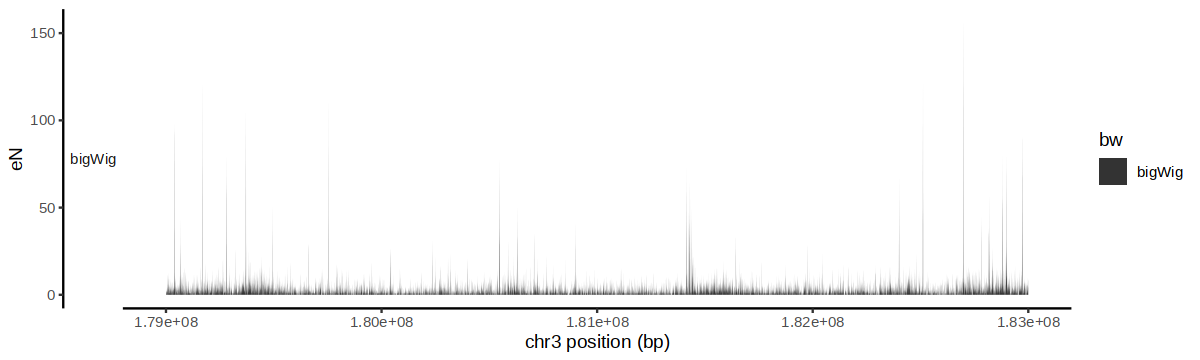

In [36]:
options(repr.plot.width=10,repr.plot.height=3)
BigwigTrack(
  h.sox2,
  "/lustre/user/liclab/cuizj/OCEANC2.0/OCEANC2.0_newdata/humanBrain/MACS2.rmdDE.bw/all.eN.rmdDE.macs2.ext200.shift100.0.01_treat_pileup.bw",
  smooth = 100,
  extend.upstream = 0,
  extend.downstream = 0,
  type = "coverage",
  y_label = "eN",
  bigwig.scale = "common",
  #ymax = 60,
  #max.downsample = 3000,
  #downsample.rate = 0.1
)
ggsave("../../../../FINAL_figures/fig1b.humanBrain_1k_PFC_sox2.eN.pdf",width=10,height=3)

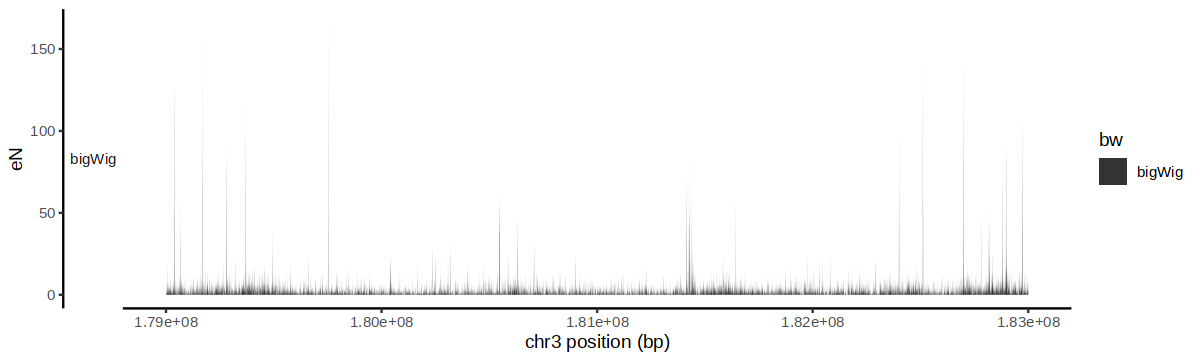

In [45]:
options(repr.plot.width=10,repr.plot.height=3)
BigwigTrack(
  h.sox2,
  "/lustre/user/liclab/cuizj/OCEANC2.0/OCEANC2.0_newdata/humanBrain/MACS2.rmdDE.bw/all.RG.rmdDE.macs2.ext200.shift100.0.01_treat_pileup.bw",
  smooth = 100,
  extend.upstream = 0,
  extend.downstream = 0,
  type = "coverage",
  y_label = "eN",
  bigwig.scale = "common",
  #ymax = 60,
  #max.downsample = 3000,
  #downsample.rate = 0.1
)
ggsave("../../../../FINAL_figures/fig1b.humanBrain_1k_PFC_sox2.RG.pdf",width=10,height=3)

In [48]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/humanBrain.RG.chr3:179000000-183000000.sox2.pdf",width=2.2,height=1.8)
ComplexHeatmap::pheatmap(hRG.50.sox2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         #color=colorRampPalette(c("blue","white","orange","red"))(500),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [49]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/humanBrain.eN.chr3:179000000-183000000.sox2.pdf",width=2.2,height=1.8)
ComplexHeatmap::pheatmap(heN.50.sox2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         #color=colorRampPalette(c("blue","white","orange","red"))(500),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [ ]:
#SATB2:chr2:200,333,989-200337989

In [58]:
hRG.50.satb2 <- mySubMat("chr2",198500000,201500000,hRG.50.mat,res=50000)
heN.50.satb2 <- mySubMat("chr2",198500000,201500000,heN.50.mat,res=50000)

In [52]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/humanBrain_1K-PFC_RG.chr2:198500000-201500000.50kb.satb2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(hRG.50.satb2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [53]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/humanBrain_1K-PFC_eN.chr2:198500000-201500000.50kb.satb2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(heN.50.satb2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [60]:
h.satb2 <- data.frame(seqnames="chr2",start=198500000,end=201500000) %>%
makeGRangesFromDataFrame()

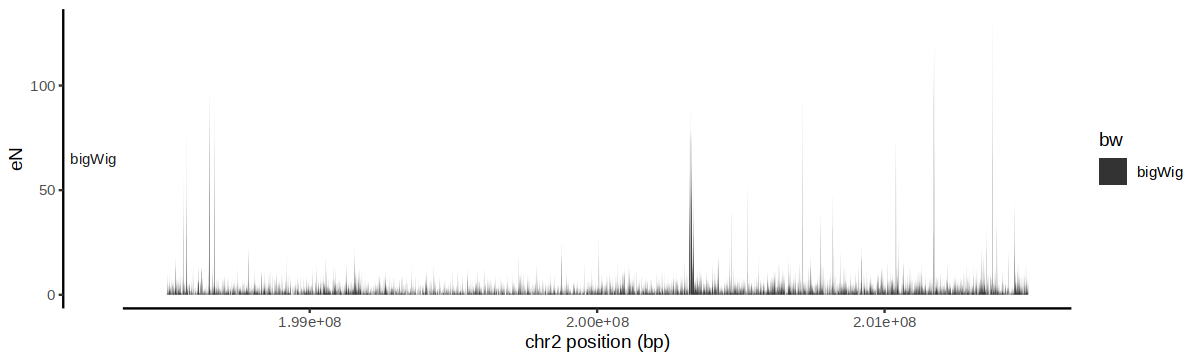

In [61]:
options(repr.plot.width=10,repr.plot.height=3)
BigwigTrack(
  h.satb2,
  "/lustre/user/liclab/cuizj/OCEANC2.0/OCEANC2.0_newdata/humanBrain/MACS2.rmdDE.bw/all.eN.rmdDE.macs2.ext200.shift100.0.01_treat_pileup.bw",
  smooth = 100,
  extend.upstream = 0,
  extend.downstream = 0,
  type = "coverage",
  y_label = "eN",
  bigwig.scale = "common",
  #ymax = 60,
  #max.downsample = 3000,
  #downsample.rate = 0.1
)
ggsave("../../../../FINAL_figures/fig1b.humanBrain_1k_PFC_satb2.eN.pdf",width=10,height=3)

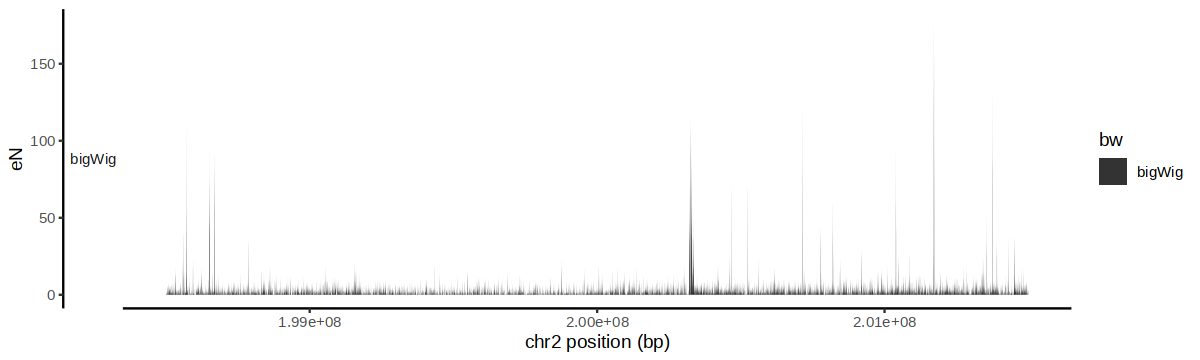

In [62]:
options(repr.plot.width=10,repr.plot.height=3)
BigwigTrack(
  h.satb2,
  "/lustre/user/liclab/cuizj/OCEANC2.0/OCEANC2.0_newdata/humanBrain/MACS2.rmdDE.bw/all.RG.rmdDE.macs2.ext200.shift100.0.01_treat_pileup.bw",
  smooth = 100,
  extend.upstream = 0,
  extend.downstream = 0,
  type = "coverage",
  y_label = "RG",
  bigwig.scale = "common",
  #ymax = 60,
  #max.downsample = 3000,
  #downsample.rate = 0.1
)
ggsave("../../../../FINAL_figures/fig1b.humanBrain_1k_PFC_satb2.RG.pdf",width=10,height=3)

## macaca

In [ ]:
# SOX2: chr2:86,872,370-86876371

In [63]:
rhRG.50.sox2 <- mySubMat("chr2",84500000,88500000,rhRG.50.mat,res=50000)
rheN.50.sox2 <- mySubMat("chr2",84500000,88500000,rheN.50.mat,res=50000)

In [71]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/macacaBrain_1K_RG.chr2:84500000-88500000.50kb.sox2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(rhRG.50.sox2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [72]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/macacaBrain_1K_eN.chr2:84500000-88500000.50kb.sox2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(rheN.50.sox2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [ ]:
jialumeng 054220

In [ ]:
# SATB2: chr12:86,364,376-86368377

In [68]:
rhRG.50.satb2 <- mySubMat("chr12",84000000,88000000,rhRG.50.mat,res=50000)
rheN.50.satb2 <- mySubMat("chr12",84000000,88000000,rheN.50.mat,res=50000)

In [73]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/macacaBrain_1K_RG.chr12:84000000-88000000.50kb.stab2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(rhRG.50.satb2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [74]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/macacaBrain_1K_eN.chr12:84000000-88000000.50kb.stab2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(rheN.50.satb2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [76]:
rh.sox2 <- data.frame(seqnames="chr2",start=84500000,end=88500000) %>%
makeGRangesFromDataFrame()

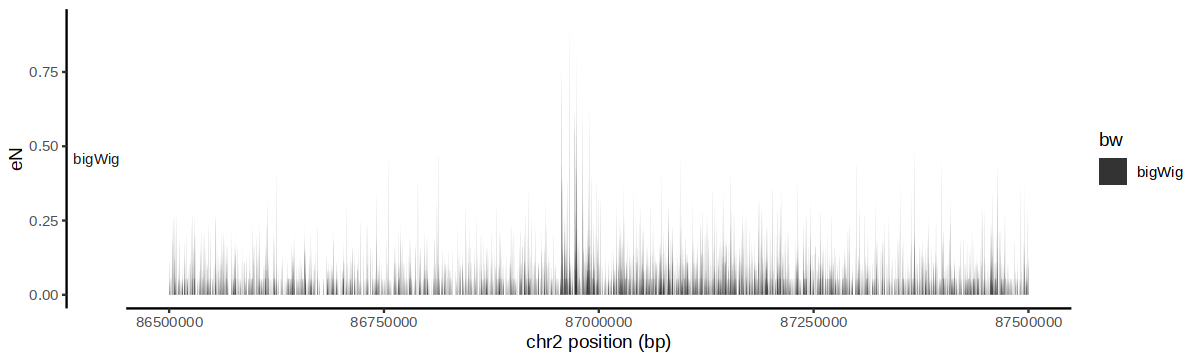

In [78]:
options(repr.plot.width=10,repr.plot.height=3)
BigwigTrack(
  rh.sox2,
  "/lustre/user/liclab/jialm/Project/SCOPEC/cleanData/MACS2.rmdDE.bw/macaca/merge220110-220111/all.2batch.merge.eN.RMD.DEPairs.bed.sort.bam.cpm.bw",
  smooth = 100,
  extend.upstream = 0,
  extend.downstream = 0,
  type = "coverage",
  y_label = "eN",
  bigwig.scale = "common",
  #ymax = 60,
  #max.downsample = 3000,
  #downsample.rate = 0.1
)
#ggsave("../../../../FINAL_figures/fig1b.humanBrain_1k_PFC_satb2.eN.pdf",width=10,height=3)

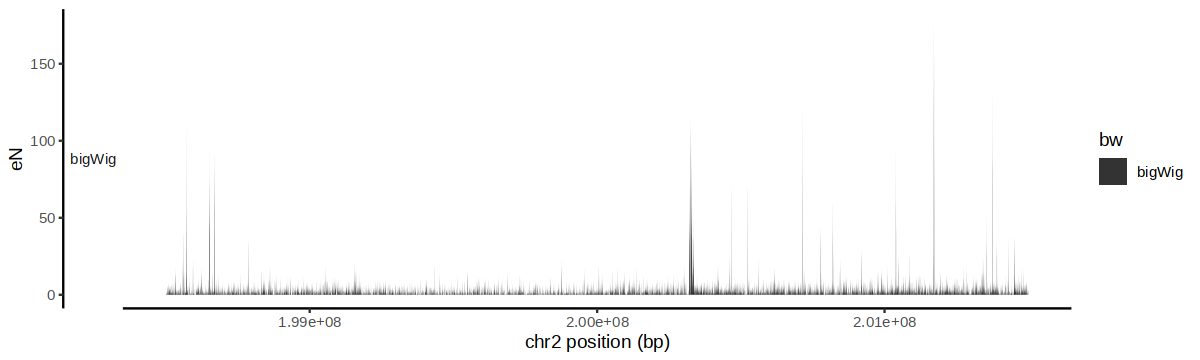

In [62]:
options(repr.plot.width=10,repr.plot.height=3)
BigwigTrack(
  h.satb2,
  "/lustre/user/liclab/cuizj/OCEANC2.0/OCEANC2.0_newdata/humanBrain/MACS2.rmdDE.bw/all.RG.rmdDE.macs2.ext200.shift100.0.01_treat_pileup.bw",
  smooth = 100,
  extend.upstream = 0,
  extend.downstream = 0,
  type = "coverage",
  y_label = "RG",
  bigwig.scale = "common",
  #ymax = 60,
  #max.downsample = 3000,
  #downsample.rate = 0.1
)
ggsave("../../../../FINAL_figures/fig1b.humanBrain_1k_PFC_satb2.RG.pdf",width=10,height=3)

In [60]:
rh.satb2 <- data.frame(seqnames="chr2",start=198500000,end=201500000) %>%
makeGRangesFromDataFrame()

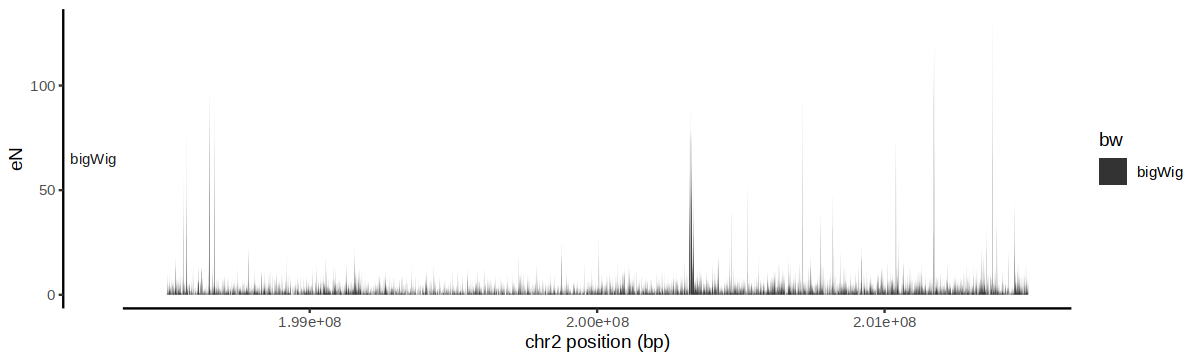

In [61]:
options(repr.plot.width=10,repr.plot.height=3)
BigwigTrack(
  rh.satb2,
  "/lustre/user/liclab/cuizj/OCEANC2.0/OCEANC2.0_newdata/humanBrain/MACS2.rmdDE.bw/all.eN.rmdDE.macs2.ext200.shift100.0.01_treat_pileup.bw",
  smooth = 100,
  extend.upstream = 0,
  extend.downstream = 0,
  type = "coverage",
  y_label = "eN",
  bigwig.scale = "common",
  #ymax = 60,
  #max.downsample = 3000,
  #downsample.rate = 0.1
)
ggsave("../../../../FINAL_figures/fig1b.humanBrain_1k_PFC_satb2.eN.pdf",width=10,height=3)

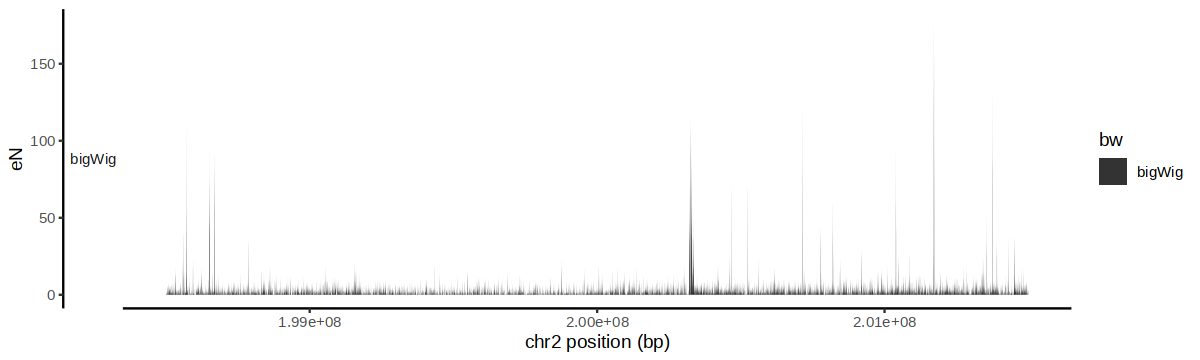

In [62]:
options(repr.plot.width=10,repr.plot.height=3)
BigwigTrack(
  h.satb2,
  "/lustre/user/liclab/cuizj/OCEANC2.0/OCEANC2.0_newdata/humanBrain/MACS2.rmdDE.bw/all.RG.rmdDE.macs2.ext200.shift100.0.01_treat_pileup.bw",
  smooth = 100,
  extend.upstream = 0,
  extend.downstream = 0,
  type = "coverage",
  y_label = "RG",
  bigwig.scale = "common",
  #ymax = 60,
  #max.downsample = 3000,
  #downsample.rate = 0.1
)
ggsave("../../../../FINAL_figures/fig1b.humanBrain_1k_PFC_satb2.RG.pdf",width=10,height=3)

## mouse

In [ ]:
#SOX2: chr3:34,648,405-34652404

In [ ]:
mRG.50.sox2 <- mySubMat("chr3",32000000,36000000,mRG.50.mat,res=50000)
meN.50.sox2 <- mySubMat("chr3",32000000,36000000,meN.50.mat,res=50000)

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../FINAL_figures/macaca_1K_PFC/RG.chr17:30589997-40989101.50kb.oe.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(mRG.50.sox2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../FINAL_figures/macaca_1K_PFC/RG.chr17:30589997-40989101.50kb.oe.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(meN.50.sox2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

In [ ]:
# satb2 :chr1    56,976,651        56980650

In [ ]:
mRG.50.satb2 <- mySubMat("chr1",54000000,58000000,mRG.50.mat,res=50000)
meN.50.satb2 <- mySubMat("chr1",54000000,58000000,meN.50.mat,res=50000)

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../FINAL_figures/macaca_1K_PFC/RG.chr17:30589997-40989101.50kb.oe.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(mRG.50.satb2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../FINAL_figures/macaca_1K_PFC/RG.chr17:30589997-40989101.50kb.oe.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(meN.50.satb2,fontsize = 8,
                         color=viridis::turbo(500,direction = 1),
                         breaks=c(0.2,10),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

# stripes

In [ ]:
getStripesPlotDF <- function(bed3,mat,...){
    L <- lapply(1:dim(bed3)[1],function(idx){
    seq=bed3[idx,1]
    s=bed3[idx,2]
    e=bed3[idx,3]
    RG <- mat %>% filter(seqnames==seq,V1>=s,V2<=e) %>% 
    mutate(s=s,idl=((V1-s)/50000)+1,idr=((V2-s)/50000)+1)
    return(RG)
    })
    
    MAT <- matrix(0,ncol = 201,nrow=201)
    ########
    L.matrix <- lapply(L,function(idx){
    mat <- matrix(0,ncol = 201,nrow=201)
    for(i in 1:dim(idx)[1]){
    id1 <- idx[i,6]
    id2 <- idx[i,7]
    score <- idx[i,3]
    MAT[id1,id2] <- score
    MAT[id2,id1] <- score
    }
    return(MAT)
    })
    
    sumMAT.L <- matrix(0,ncol = 201,nrow=201)
    
    ########
    for (i in 1:length(L.matrix)){
     sumMAT.L <- sumMAT.L + L.matrix[[i]]
    }
    
    ########
    return(sumMAT.L)

}

## human

In [ ]:
h.L <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Left.startbin.homowithMacaca") %>% 
select(V1,V2,V3) %>% distinct() %>%
mutate(V2=V2-500000,V3=V2+10000000)

h.R <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Right.endbin.homowithMacaca") %>% 
select(V1,V2,V3) %>% distinct() %>%
mutate(V3=V3+500000,V2=V3-10000000) 

In [ ]:
h.L.RG.mat <- getStripesPlotDF(h.L,hRG.50.mat)
h.R.RG.mat <- getStripesPlotDF(h.R,hRG.50.mat)
h.L.eN.mat <- getStripesPlotDF(h.L,heN.50.mat)
h.R.eN.mat <- getStripesPlotDF(h.R,heN.50.mat)

In [ ]:
saveRDS(h.L.RG.mat,"./stripes.mat/humanBrain_1K_h.L.RG.mat.RDS")
saveRDS(h.R.RG.mat,"./stripes.mat/humanBrain_1K_h.R.RG.mat.RDS")
saveRDS(h.L.eN.mat,"./stripes.mat/humanBrain_1K_h.L.eN.mat.RDS")
saveRDS(h.R.eN.mat,"./stripes.mat/humanBrain_1K_h.R.eN.mat.RDS")

In [ ]:
colours <- colorRampPalette(c("navy","white","red"))(500)

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(h.L.RG.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(h.L.eN.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(h.R.RG.mat[100:201,100:201],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(h.R.eN.mat[100:201,100:201],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

## macaca

In [ ]:
rh.L <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Left.startbin.2rheMac.sort.midsites.50kb.bin") %>% 
select(V2,V3,V4) %>% distinct() %>%
mutate(V3=V3-500000,V4=V3+10000000)

rh.R <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Right.endbin.2rheMac.sort.midsites.50kb.bin") %>% 
select(V2,V3,V4) %>% distinct() %>%
mutate(V4=V4+500000,V3=V4-10000000) 

In [ ]:
rh.L.RG.mat <- getStripesPlotDF(rh.L,rhRG.50.mat)
rh.R.RG.mat <- getStripesPlotDF(rh.R,rhRG.50.mat)
rh.L.eN.mat <- getStripesPlotDF(rh.L,rheN.50.mat)
rh.R.eN.mat <- getStripesPlotDF(rh.R,rheN.50.mat)

In [ ]:
saveRDS(rh.L.RG.mat,"./stripes.mat/macacaBrain_1K_h.L.RG.mat.RDS")
saveRDS(rh.R.RG.mat,"./stripes.mat/macacaBrain_1K_h.R.RG.mat.RDS")
saveRDS(rh.L.eN.mat,"./stripes.mat/macacaBrain_1K_h.L.eN.mat.RDS")
saveRDS(rh.R.eN.mat,"./stripes.mat/macacaBrain_1K_h.R.eN.mat.RDS")

In [ ]:
ComplexHeatmap::pheatmap(rh.L.RG.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
ComplexHeatmap::pheatmap(rh.L.eN.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
ComplexHeatmap::pheatmap(rh.R.RG.mat[100:201,100:201],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(20,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
ComplexHeatmap::pheatmap(rh.R.eN.mat[100:201,100:201],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(20,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

## human specific

In [ ]:
hs.L <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Left.startbin.human.specific") %>% 
select(V1,V2,V3) %>% distinct() %>%
mutate(V2=V2-500000,V3=V2+10000000)

hs.R <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Right.endbin.human.specific") %>% 
select(V1,V2,V3) %>% distinct() %>%
mutate(V3=V3+500000,V2=V3-10000000) 

In [ ]:
hs.L.RG.mat <- getStripesPlotDF(hs.L,hRG.50.mat)
hs.R.RG.mat <- getStripesPlotDF(hs.R,hRG.50.mat)
hs.L.eN.mat <- getStripesPlotDF(hs.L,heN.50.mat)
hs.R.eN.mat <- getStripesPlotDF(hs.R,heN.50.mat)

In [ ]:
saveRDS(hs.L.RG.mat,"./stripes.mat/humanBrain_1K_hs.L.RG.mat.RDS")
saveRDS(hs.R.RG.mat,"./stripes.mat/humanBrain_1K_hs.R.RG.mat.RDS")
saveRDS(hs.L.eN.mat,"./stripes.mat/humanBrain_1K_hs.L.eN.mat.RDS")
saveRDS(hs.R.eN.mat,"./stripes.mat/humanBrain_1K_hs.R.eN.mat.RDS")

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(hs.L.RG.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(60,200),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(hs.L.eN.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(60,200),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(hs.R.RG.mat[101:200,101:200],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(60,200),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(hs.R.eN.mat[101:200,101:200],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(60,200),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 